# Isentropic ratios plot

Before explaining the solver, just a quick visual sanity check with the ratios plot.

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from pygasflow import isentropic_solver

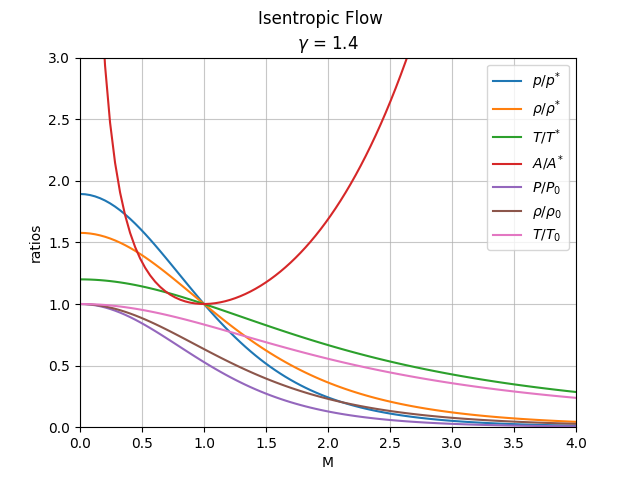

In [2]:
gamma = 1.4
M = np.linspace(1e-05, 4, 100)
results = isentropic_solver("m", M, gamma)

plt.figure()
plt.plot(M, results[4], label=r"$p / p^{*}$")
plt.plot(M, results[5], label=r"$\rho / \rho^{*}$")
plt.plot(M, results[6], label=r"$T / T^{*}$")
plt.plot(M, results[8], label=r"$A / A^{*}$")
plt.plot(M, results[1], label=r"$P / P_{0}$")
plt.plot(M, results[2], label=r"$\rho / \rho_{0}$")
plt.plot(M, results[3], label=r"$T / T_{0}$")

plt.xlim(0, max(M))
plt.ylim(0, 3)
plt.xlabel("M")
plt.ylabel("ratios")
plt.grid(which='major', linestyle='-', alpha=0.7)
plt.grid(which='minor', linestyle=':', alpha=0.5)
plt.legend(loc='upper right')
plt.suptitle("Isentropic Flow")
plt.title("$\gamma$ = " + str(gamma))
plt.show()

# Isentropic Solver

This solver allows to quickly compute the Mach number, all the ratios and angles (Mach angle, Prandtl-Meyer angle) by specifying what parameter we do know.

Let's read the solver's documentation:

In [3]:
help(isentropic_solver)

Help on function isentropic_solver in module pygasflow.solvers.isentropic:

isentropic_solver(param_name, param_value, gamma=1.4)
    Compute all isentropic ratios and Mach number given an input parameter.
    
    Parameters
    ----------
    param_name : string
        Name of the parameter given in input. Can be either one of:
    
        * ``'m'``: Mach number
        * ``'pressure'``: Pressure Ratio P/P0
        * ``'density'``: Density Ratio rho/rho0
        * ``'temperature'``: Temperature Ratio T/T0
        * ``'crit_area_sub'``: Critical Area Ratio A/A* for subsonic case.
        * ``'crit_area_super'``: Critical Area Ratio A/A* for supersonic case.
        * ``'mach_angle'``: Mach Angle in degrees.
        * ``'prandtl_meyer'``: Prandtl-Meyer Angle in degrees.
    
    param_value : float/list/array_like
        Actual value of the parameter. If float, list, tuple is given as
        input, a conversion will be attempted.
    gamma : float, optional
        Specific heats r

This is just a pretty print function...

In [4]:
def print_isentropic(M, pr, dr, tr, prs, drs, trs, urs, ar, ma, pm):
    print("M \t\t {}".format(M))
    print("P/P0 \t\t {}".format(pr))
    print("rho/rho0 \t {}".format(dr))
    print("T/T0 \t\t {}".format(tr))
    print("P/P* \t\t {}".format(prs))
    print("rho/rho* \t {}".format(drs))
    print("T/T* \t\t {}".format(trs))
    print("U/U* \t\t {}".format(urs))
    print("A/A* \t\t {}".format(ar))
    print("Mach Angle \t {}".format(ma))
    print("Prandtl-Meyer \t {}".format(pm))
    print()

In [5]:
result = isentropic_solver('m', 2)
print_isentropic(*result)

M 		 2.0
P/P0 		 0.12780452546295096
rho/rho0 	 0.2300481458333117
T/T0 		 0.5555555555555556
P/P* 		 0.24192491286747442
rho/rho* 	 0.36288736930121157
T/T* 		 0.6666666666666667
U/U* 		 2.3515101530718505
A/A* 		 1.6875000000000002
Mach Angle 	 30.000000000000004
Prandtl-Meyer 	 26.379760813416457



In [6]:
r1 = isentropic_solver('pressure', 0.12780452546295096)
r2 = isentropic_solver('crit_area_super', 1.6875000000000002)
r3 = isentropic_solver('mach_angle', 30)
r4 = isentropic_solver('prandtl_meyer', 26.379760813416457)
print_isentropic(*r1)
print_isentropic(*r2)
print_isentropic(*r3)
print_isentropic(*r4)

M 		 1.9999999999999996
P/P0 		 0.12780452546295107
rho/rho0 	 0.23004814583331185
T/T0 		 0.5555555555555558
P/P* 		 0.24192491286747458
rho/rho* 	 0.3628873693012118
T/T* 		 0.6666666666666669
U/U* 		 2.3515101530718505
A/A* 		 1.6874999999999993
Mach Angle 	 30.00000000000001
Prandtl-Meyer 	 26.379760813416446

M 		 1.9999999999986215
P/P0 		 0.127804525463225
rho/rho0 	 0.230048145833664
T/T0 		 0.555555555555896
P/P* 		 0.24192491286799306
rho/rho* 	 0.36288736930176735
T/T* 		 0.6666666666670751
U/U* 		 2.3515101530709503
A/A* 		 1.6874999999980616
Mach Angle 	 30.0000000000228
Prandtl-Meyer 	 26.379760813378457

M 		 2.0000000000000004
P/P0 		 0.12780452546295085
rho/rho0 	 0.23004814583331154
T/T0 		 0.5555555555555555
P/P* 		 0.24192491286747414
rho/rho* 	 0.36288736930121135
T/T* 		 0.6666666666666665
U/U* 		 2.351510153071851
A/A* 		 1.6875000000000007
Mach Angle 	 29.999999999999993
Prandtl-Meyer 	 26.379760813416485

M 		 1.9999999999986215
P/P0 		 0.127804525463225
rho/rh

Should you wish to solve for more than one Mach number (or ratios) at the same time, you can do:

In [7]:
result = isentropic_solver('m', [0.5, 1, 2, 4])
print_isentropic(*result)

M 		 [0.5 1.  2.  4. ]
P/P0 		 [0.84301918 0.52828179 0.12780453 0.00658609]
rho/rho0 	 [0.88517013 0.63393815 0.23004815 0.02766157]
T/T0 		 [0.95238095 0.83333333 0.55555556 0.23809524]
P/P* 		 [1.59577558 1.         0.24192491 0.012467  ]
rho/rho* 	 [1.39630363 1.         0.36288737 0.04363449]
T/T* 		 [1.14285714 1.         0.66666667 0.28571429]
U/U* 		 [0.76971238 1.44       2.35151015 3.07884951]
A/A* 		 [ 1.33984375  1.          1.6875     10.71875   ]
Mach Angle 	 [        nan 90.         30.         14.47751219]
Prandtl-Meyer 	 [        nan  0.         26.37976081 65.7848198 ]



In [8]:
result = isentropic_solver('temperature', [0.95238095, 0.83333333, 0.55555556, 0.23809524])
print_isentropic(*result)

M 		 [0.50000001 1.00000001 1.99999998 3.99999998]
P/P0 		 [0.84301917 0.52828178 0.12780453 0.00658609]
rho/rho0 	 [0.88517013 0.63393814 0.23004815 0.02766157]
T/T0 		 [0.95238095 0.83333333 0.55555556 0.23809524]
P/P* 		 [1.59577556 0.99999999 0.24192492 0.012467  ]
rho/rho* 	 [1.39630362 0.99999999 0.36288738 0.04363449]
T/T* 		 [1.14285714 1.         0.66666667 0.28571429]
U/U* 		 [0.7697124  1.44000001 2.35151014 3.0788495 ]
A/A* 		 [ 1.33984372  1.          1.68749997 10.7187498 ]
Mach Angle 	 [        nan 89.99112378 30.0000003  14.47751226]
Prandtl-Meyer 	 [           nan 5.91748286e-11 2.63797603e+01 6.57848195e+01]

